In [ ]:
import pandas as pd

# dex_df = pd.read_csv("dex_dataset.csv", index_col=False)
# manif_df = pd.read_csv("processed_manifest.csv", index_col=False)

# df = pd.merge(manif_df, dex_df, left_on="id", right_on="id", how="inner").drop(["idx", "Unnamed: 0", "is_malicious_x"], axis=1)
# df.rename(columns={"is_malicious_y": "is_malicious"}, inplace=True)

# df.to_csv("dataset.csv", index=False)

df = pd.read_csv("dataset.csv")

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(["id", "is_malicious"], axis=1)
y = df["is_malicious"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1071
           1       0.90      0.93      0.91      1085

    accuracy                           0.91      2156
   macro avg       0.91      0.91      0.91      2156
weighted avg       0.91      0.91      0.91      2156



In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

In [27]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1019
           1       0.89      0.88      0.88      1137

    accuracy                           0.88      2156
   macro avg       0.88      0.88      0.88      2156
weighted avg       0.88      0.88      0.88      2156



In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [29]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1051
           1       0.89      0.91      0.90      1105

    accuracy                           0.90      2156
   macro avg       0.90      0.90      0.90      2156
weighted avg       0.90      0.90      0.90      2156



In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)

In [50]:
print(classification_report(mlp_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1033
           1       0.91      0.92      0.92      1123

    accuracy                           0.91      2156
   macro avg       0.91      0.91      0.91      2156
weighted avg       0.91      0.91      0.91      2156



In [32]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

linear_svc_pred = linear_svc.predict(X_test)

/Users/kamil/miniconda3/envs/bigdata-project/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
print(classification_report(linear_svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.87      0.88      0.87      1120

    accuracy                           0.87      2156
   macro avg       0.87      0.87      0.87      2156
weighted avg       0.87      0.87      0.87      2156



In [34]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

In [35]:
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1036
           1       0.90      0.91      0.91      1120

    accuracy                           0.90      2156
   macro avg       0.90      0.90      0.90      2156
weighted avg       0.90      0.90      0.90      2156



In [36]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

gauss_nb_pred = gauss_nb.predict(X_test)

In [38]:
print(classification_report(gauss_nb_pred, y_test))

              precision    recall  f1-score   support

           0       0.11      0.97      0.20       117
           1       1.00      0.55      0.71      2039

    accuracy                           0.58      2156
   macro avg       0.55      0.76      0.46      2156
weighted avg       0.95      0.58      0.68      2156



In [43]:
# Calculate F1 score for all models

from sklearn.metrics import f1_score

rf_score = f1_score(rf_pred, y_test)
dt_score = f1_score(dt_pred, y_test)
knn_score = f1_score(knn_pred, y_test)
mlp_score = f1_score(mlp_pred, y_test)
linear_svc_score = f1_score(linear_svc_pred, y_test)
svc_score = f1_score(svc_pred, y_test)
gauss_nb_score = f1_score(gauss_nb_pred, y_test)

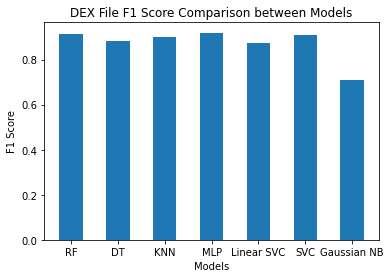

In [44]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

scores = [rf_score, dt_score, knn_score, mlp_score, linear_svc_score, svc_score, gauss_nb_score]
labels = ["RF", "DT", "KNN", "MLP", "Linear SVC", "SVC", "Gaussian NB"]

plt.bar(labels, scores, width=0.5)
plt.title("DEX File F1 Score Comparison between Models")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.show()